In [3]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import functools
import community

from scipy import sparse
from scipy.sparse import linalg
import time
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping
from math import sqrt
import pandas as pd
from shapely.ops import cascaded_union
pd.set_option('precision', 10)

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.options.mode.chained_assignment = None

In [4]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [5]:
import street_network_functions as snf

In [55]:
from importlib import reload
reload(snf)

<module 'street_network_functions' from 'C:\\Users\\g_filo01\\sciebo\\scripts\\Image of the City\\street_network_functions.py'>

In [2]:
add_lond = 'Oxford Circus, Argyll Street, Soho, Westminster, London, Greater London, England, W1F 7TN, United Kingdom'

In [70]:
crs_osm = {'init':'epsg:4326'}  

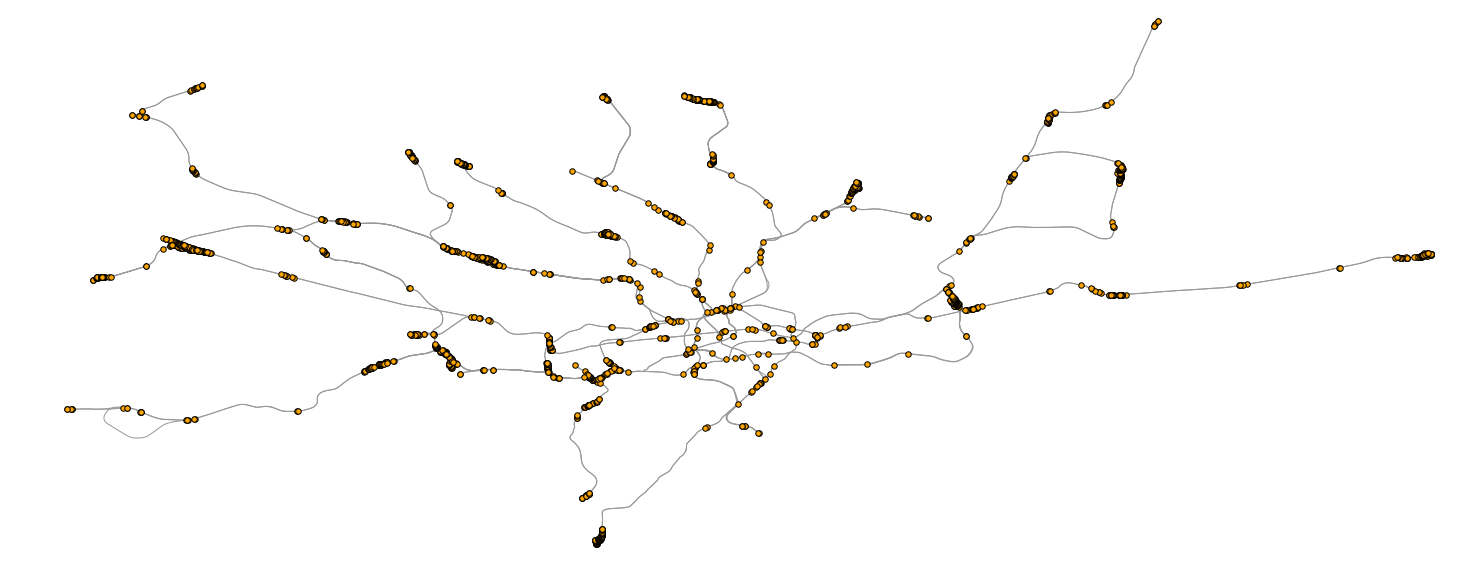

In [96]:
# address = 'Via Roma, Centro Storico, Circoscrizione 1, Turin, TO, Piemont, 10121, Italy'
f = ox.graph_from_address('Greater London (175342)', clean_periphery = True, simplify = True, distance = 30000,
                          network_type='none', infrastructure= 'way["railway"~"subway"]')
fig, ax = ox.plot_graph(f, fig_height=10, node_color='orange', node_size=30, node_zorder=2, node_edgecolor='k')

In [56]:
nodes = ox.graph_to_gdfs(f, edges=False)
edges = ox.graph_to_gdfs(f, nodes = False)
nodes = nodes.to_crs(epsg = 27700)
edges = edges.to_crs(epsg = 27700)

In [84]:
stations_data = pd.read_csv('C:/Users/g_filo01/sciebo/GIS Data/London/Public_Transport/London_stations.csv')
stations_data.head()

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Abbey Road,539081,183352,51.5319519900,0.0037233710,3,E15 3NB
1,Abbey Wood,547297,179002,51.4907841000,0.1202719700,4,SE2 9RH
2,Acton Central,520613,180299,51.5087577800,-0.2634301990,2,W3 6BD
3,Acton Main Line,520296,181196,51.5168869300,-0.2676899520,3,W3 0BP
4,Acton Town,519457,179639,51.5030714400,-0.2803027010,3,W3 8HN


In [85]:
geometry = [Point(xy) for xy in zip(stations_data.Longitude, tube_data.Latitude)]

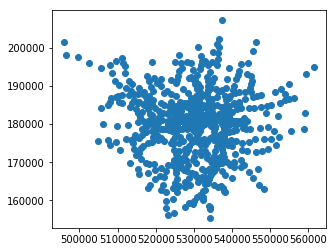

In [94]:
stations = gpd.GeoDataFrame(stations_data, crs = crs_osm, geometry = geometry)
stations = stations[['Station', 'Zone', 'geometry']]
stations = stations.to_crs(epsg = 27700)
stations.plot()

In [95]:
stations['x'], stations['y'] = list(zip(*[(r.coords[0][0], r.coords[0][1]) for r in stations.geometry]))

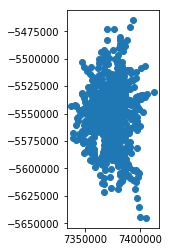

In [6]:

nodes = nodes.to_crs(epsg = 27700)
edges = edges.to_crs(epsg = 27700)
nodes['x'], nodes['y'] = list(zip(*[(r.coords[0][0], r.coords[0][1]) for r in nodes.geometry]))
# epsg_turin = 3003

In [ ]:
nodes, edges = snf.reset_index_gdf(nodes, edges)
nodes, edges = snf.simplify_network(nodes, edges, dead_ends = True)
nodes_p, edges_p = nodes.copy(), edges.copy()

# nodes, junctions = snf.simplify_junctions(nodes, edges, 12)

In [98]:
nodes, edges = nodes_p.copy(), edges_p.copy()

In [101]:
nodes, edges = simp(nodes, edges)

1746 3660 4067
1746 3660 check
interpolating1 1746
5502 new_index
2449 4113 2820
2449 4113 check
interpolating1 2449
5503 new_index
2466 2467 2465
2466 2467 check
interpolating1 2466
5504 new_index
2471 3340 4832
2471 3340 check
interpolating1 2471
5505 new_index
2769 2772 2822
2769 2772 check
interpolating1 2769
5506 new_index
3443 941 1149
3443 941 check
interpolating1 3443
5507 new_index
4655 4659 4810
4655 4659 check
interpolating1 4655
5508 new_index
4942 5409 4753
4942 5409 check
interpolating1 4942
5509 new_index
4947 5402 2502
4947 5402 check
interpolating1 4947
5510 new_index
5027 4058 5481
5027 4058 check
interpolating1 5027
5511 new_index
5293 5330 4958
5293 5330 check
interpolating1 5293
5512 new_index
5303 5311 4014
5303 5311 check
interpolating1 5303
5513 new_index
Done


In [82]:
snf.isparallel(edges.loc[5481].geometry, edges.loc[5027].geometry)

True

In [102]:
edges[['geometry', 'streetID', 'u', 'v']].to_file('edges_vvv.shp', driver='ESRI Shapefile')

In [111]:
nodes_p, edges_p = nodes.copy(), edges.copy()
edges[['geometry', 'streetID', 'u', 'v']].to_file('edges_pre.shp', driver='ESRI Shapefile')

In [37]:
nodes, edges = snf.simplify_dual_lines(nodes_p, edges_p, junctions)

NameError: name 'junctions' is not defined

In [113]:
nodes, edges = snf.correct_edges(nodes, edges, junctions)

Correcting edges coordinates..
Done


In [114]:
nodes, edges = snf.simplify_network(nodes, edges, dead_ends = True)
# nodes, edges, = snf.reset_index_gdf(nodes, edges)

Eliminating duplicate geometries - nodes..
Cleaning and simplyfing network:
Potential duplicate edges:  7
Cycle nr.  0 =============
Eliminating duplicate geometries - edges..
Checking lines with same nodes..
Removing dead ends..
Removing pseudo-nodes..
Potential duplicate edges:  3
Cycle nr.  1 =============
Eliminating duplicate geometries - edges..
Checking lines with same nodes..
Removing dead ends..
Removing pseudo-nodes..
Done all =========


In [115]:
edges[['geometry', 'streetID', 'u', 'v']].to_file('edges_after.shp', driver='ESRI Shapefile')

In [ ]:
cc.drop('centroid', axis = 1, inplace = True)

In [ ]:
cc = GeoDataFrame(cc, crs=crs, geometry=junctions['centroid'])

In [ ]:
cc.to_file('centroids.shp', driver='ESRI Shapefile')

In [ ]:
%%time
nodes, edges = snf.reset_index_gdf(nodes, edges)
# nodes, edges = snf.simplify_network(nodes, edges, dead_ends = True)
# nodes, centroids = snf.simplify_junctions(nodes, edges, 15)

In [108]:
int(48.8)

48

In [96]:
def simp(nodes_gdf, edges_gdf):
    
    edges_gdf = edges_gdf.copy()
    nodes_gdf = nodes_gdf.copy()

    index_geometry = edges_gdf.columns.get_loc("geometry")+1
    index_u = edges_gdf.columns.get_loc("u")+1
    index_v = edges_gdf.columns.get_loc("v")+1
    index_name = edges_gdf.columns.get_loc("name")+1

    processed = []
    
    for row in edges_gdf.itertuples():
        if row[0] in processed: continue
        u = row[index_u]
        v = row[index_v]
        geo = row[index_geometry]
        
        possible_matches = edges_gdf[edges['u'] == v | edges['v'] == v].copy()
        if len(possible_matches) == 2:
            destination = v
        else: destination == None
        
        while destination == None:
            
            # look for possible continuations
            for p in possible_matches.itertuples():
                if isparallel(line, p[index_geometry], hard = True) is False:
                possible_matches.drop(p[0], axis = 0, inplace = True)
                continue
            
            if len(possible_matches) == 0: break
            for p in possible_matches: 
                uCP, vCP = p[index_u], p[index_v]
                                
                if len(edges_gdf[(edges_gdf['u'] == vCP) | (edges_gdf['u'] == vCP)]) == 2:
                    destiantion = p[index_v]
                    nodes_encountered.append(uCP)
                    lines_traversed.append(p[0])
                    line_coords = line_coords + list(p[index_geometry].coords)
                else:
                    nodes_encountered.append(uCP) 
                    nodes_encountered.append(uCP) 
                    line_coords = line_coords + list(p[index_geometry].coords)
                    possible_matches = edges_gdf[(edges_gdf.u == p[index_v])].copy()     
        
        if destination = None: continue
        
        tmp = edges_gdf[(edges_gdf['u'] == destination)].copy()
        tmp['other_line'] = 'NA'
        if len(tmp) == 0: continue    

        # take all the other segment that go to v 
        for rowC in tmp.itertuples():
            if (snf.isparallel(row[index_geometry], rowC[index_geometry]) == False
                | (geo.length < rowC[index_geometry].length)):
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue
                search = edges_gdf[(edges_gdf['u'] == rowC[index_v]) & (edges_gdf['v'] == row[index_u])].copy()
                if len(search) == 0: 
                    tmp.drop(rowC[0], axis = 0, inplace = True)
                    continue
                if snf.isparallel(row[index_geometry], search.iloc[0].geometry) == False: 
                    tmp.drop(rowC[0], axis = 0, inplace = True)
                    continue
                else: tmp.set_value(rowC[0], 'other_line', search.iloc[0].name)             

            if len(tmp) == 0: continue
            lineA = list(tmp.iloc[0].geometry.coords)
            lineB = list(edges_gdf.loc[tmp.iloc[0].other_line].geometry.coords)
            line_coords = lineA + lineB
            ml = LineString([coor for coor in line_coords])
            if abs(geo.length - ml.length) > geo.length/15: continue        
            cl = snf.center_line(u, v, v, u, geo, ml)
        
        if len(edges_gdf[edges['u'] == v | edges['v'] == v]) > 2:

         

        node_interpol = tmp.iloc[0].v
        nodes_gdf, edges_gdf = snf.interpolate(u, cl, v, [node_interpol], nodes_gdf, edges_gdf, row[0])
        processed = processed + [row[0], tmp.iloc[0].other_line, tmp.iloc[0].name]
        edges_gdf.drop([tmp.iloc[0].other_line, tmp.iloc[0].name], axis = 0, inplace = True)                       
 
    for row in edges_gdf.itertuples():
        line_list = list(row[index_geometry].coords)
        u = row[index_u]
        v = row[index_v]

        line_list[0] = (nodes_gdf.loc[u]['x'], nodes_gdf.loc[u]['y'])
        line_list[-1] = (nodes_gdf.loc[v]['x'], nodes_gdf.loc[v]['y'])
        line_geo = (LineString([coor for coor in line_list]))
        edges_gdf.set_value(row[0], 'geometry', line_geo)
        if u == v: 
            edges_gdf.drop(row[0], axis = 0, inplace = True)
            continue

    print("Done") 
    return(nodes_gdf, edges_gdf)
 
                                   
                                   


In [107]:
snf.isparallel(edges.loc[5042].geometry, edges.loc[5053].geometry, hard = True)

True

In [ ]:
def triangles


    for row in edges_gdf.itertuples()
        u = row[index_u]
        v = row[index_v]
        
        tmp = edges_gdf[edges_gdf.v == u]
        tmp['other_line'] = 'NA'
        for rowC in tmp.itertuples():
            if snf.isparallel(row[index_geometry], rowC[index_geometry]) == False: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue
            if abs(geo.length - rowC[index_geometry].length) > geo.length/15: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue 
            search = edges_gdf[((edges_gdf['u'] == rowC[index_u]) & (edges_gdf['v'] == row[index_v]))
                              | ((edges_gdf['u'] == rowC[index_v]) & (edges_gdf['v'] == row[index_u]))].copy()
            if len(search) == 0: 
                tmp.drop(rowC[0], axis = 0, inplace = True)
                continue 
            
        if len(tmp)== 0: continue
        for rowC in tmp.itertuples():
            geoC = rowC[index_geometry]
            cl = snf.center_line(u, v, uC, vC, geo, geoC)
            
            
            
                continue 
            
            
        
    

In [ ]:
def simplify_dual_lines(nodes_gdf, edges_gdf, centroids_gdf):
    
    edges_gdf = edges_gdf.copy()
    nodes_gdf = nodes_gdf.copy()
    list_cluster = centroids_gdf.index.values.tolist()  
    edges_gdf = pd.merge(edges_gdf, nodes_gdf[['cluster', 'nodeID']], how= 'left', left_on= "u", right_on = "nodeID")
    edges_gdf = edges_gdf.rename(columns = {'cluster':'cluster_u'})
    edges_gdf = pd.merge(edges_gdf, nodes_gdf[['cluster', 'nodeID']], how= 'left', left_on= "v", right_on = "nodeID")
    edges_gdf = edges_gdf.rename(columns = {'cluster':'cluster_v'})
    
    edges_gdf.set_index('streetID', drop = False, inplace= True)
        
    index_geometry = edges_gdf.columns.get_loc("geometry")+1
    index_cluster_u = edges_gdf.columns.get_loc("cluster_u")+1
    index_cluster_v = edges_gdf.columns.get_loc("cluster_v")+1
    index_u = edges_gdf.columns.get_loc("u")+1
    index_v = edges_gdf.columns.get_loc("v")+1
    index_name = edges_gdf.columns.get_loc("name")+1
    
    index_cluster = nodes_gdf.columns.get_loc("cluster")+1
    
    edges_gdf['cluster_uR'] = None
    edges_gdf['cluster_vR'] = None
    
    index_cluster_uR = edges_gdf.columns.get_loc("cluster_uR")+1
    index_cluster_vR = edges_gdf.columns.get_loc("cluster_vR")+1
    old_edges_gdf = edges_gdf.copy()

    for row in edges_gdf.itertuples():
        if row[index_cluster_u] == row[index_cluster_v]: continue
        if (row[index_cluster_u] == 'NA') & (row[index_cluster_v] == 'NA'): continue
        if (row[index_cluster_u] != 'NA') & (row[index_cluster_v] != 'NA'): continue
        elif row[index_cluster_u] == 'NA':
            result = snf.find_next_cluster(edges_gdf, nodes_gdf, row[0], 'u')
            destination = result[0]
            edges_gdf.set_value(row[0], 'cluster_uR', destination)
        else:
            result = snf.find_next_cluster(edges_gdf, nodes_gdf, row[0], 'v')
            destination = result[0]
            edges_gdf.set_value(row[0], 'cluster_vR', destination)
    
    ################################ FROM NODES TO CLUSTERED JUNCTIONS
    
    processed = []
    print('Simplifying dual lines: First part')
    
    for row in nodes_gdf.itertuples():
        if row[index_cluster] != 'NA': continue
        else:
            tmp = edges_gdf[((edges_gdf.u == row[0]) | (edges_gdf.v == row[0]))].copy()

            for rowC in tmp.itertuples():
                if rowC[0] in processed: continue 
                if rowC[index_u] == row[0]:
                    destination = rowC[index_cluster_v]
                    if destination == 'NA': destination = rowC[index_cluster_vR]
                elif rowC[index_v] == row[0]:
                    destination = rowC[index_cluster_u]
                    if destination == 'NA': destination = rowC[index_cluster_uR]
                if destination is None: continue


                group = tmp[((tmp.cluster_u == destination) | (tmp.cluster_uR == destination) 
                         | (tmp.cluster_v == destination) | (tmp.cluster_vR == destination))].copy()
                # orientate everything from "u" to "v"
                
                group['direction'] = 'v'
                for g in group.itertuples():
                    if g[index_v] == row[0]:
                        line_geometry = list(g[index_geometry].coords)
                        line_geometry.reverse() 
                        new_line = LineString([coor for coor in line_geometry])
                        old_u = g[index_u]
                        old_cluster_u = g[index_cluster_u]
                        old_cluster_uR = g[index_cluster_uR]

                        group.set_value(g[0],'geometry', new_line)
                        group.set_value(g[0],'u', g[index_v])
                        group.set_value(g[0],'v', old_u)
                        group.set_value(g[0],'cluster_u', g[index_cluster_v])
                        group.set_value(g[0],'cluster_v', old_cluster_u)
                        group.set_value(g[0],'cluster_uR', g[index_cluster_vR])
                        group.set_value(g[0],'cluster_vR', old_cluster_uR)
                        group.set_value(g[0], 'direction', 'u') # indicates original direction
                
                group = group[(group.cluster_v == destination) | (group.cluster_vR == destination)].copy()
                group = group[~group.index.isin(processed)]
                if len(group) == 1: continue
                
                if len(group) == 2:
                    c_v, c_vC, = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                    u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                    v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                    geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                    dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                    index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name

                    if (c_v == c_vC) & (c_v != 'NA'):
                        destination = c_v
                        cl = snf.center_line(u, v, uC, vC, geo, geoC)
                        edges_gdf.drop(index_lineC, axis = 0, inplace = True)
                        
                        if dr == 'u':
                            line_geometry = list(cl.coords)
                            line_geometry.reverse() 
                            cl = LineString([coor for coor in line_geometry])
                        
                        edges_gdf.set_value(index_line, 'geometry', cl)
                        processed = processed + [index_line, index_lineC]
                        break # next group

                    ######################################################## 
                    ## SUB-OPTION 2: only one reaches another cluster:

                    elif (c_v != 'NA') | (c_vC != 'NA'):

                        if c_v != 'NA': 
                            destination = c_v
                            found, geoC, lines_t, nodes_en, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)
                            last_node = vC
                        else: 
                            destination = c_vC
                            found, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                            last_node = v
                        
                        cl =  snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, u, destination, one_cluster = True)
                        nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)                                       
                        processed = processed + [index_line, index_lineC] + lines_t
                        lines_t.append(index_lineC)
                        edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                        break # next group                          

                    ####################################################### 
                    # SUB-OPTION 3: none reaches a cluster directly; comparing the first reached cluster
                    else:                    
                        dest, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                        destC, geoC, lines_tC, nodes_enC, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)    

                        # the center line is built in relation to the variable cluster as 'u', or from_node --> to_node
                        cl =  snf.center_line_ocluster(geo, geoC, nodes_gdf, centroids_gdf, u, dest, one_cluster = True)

                        # last node does not matter, as it will be reassigned to the relative cluster
                        list_nodes = nodes_en + nodes_enC
                        nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, v, list_nodes, nodes_gdf, edges_gdf, index_line)  

                        lines_tC.append(index_lineC)
                        edges_gdf.drop(lines_tC, axis = 0, inplace = True, errors = 'ignore')
                        processed = processed + [index_line] + lines_tC
                        break

    ################################ FROM CLUSTERED JUNCTIONS TO CLUSTERED JUNCTIONS
    
    print('Simplifying dual lines: Second part')
    processed = []
    for cluster in list_cluster:
        
        edges_tmp = edges_gdf[((edges_gdf.cluster_u == cluster) | (edges_gdf.cluster_v == cluster))].copy()
        edges_tmp = edges_tmp[edges_tmp.cluster_u != edges_tmp.cluster_v]
        if len(edges_tmp) == 1: continue
        
        for row in edges_tmp.itertuples():
            if row[0] in processed: continue                
            group = edges_tmp.copy()
            
            # eliminate unparallel lines
            for rowC in group.itertuples():
                if row[0] == rowC[0]: continue
                elif rowC[0] in processed: 
                    group.drop(rowC[0], axis = 0, inplace = True)
                    continue
                elif ((snf.isparallel(row[index_geometry], rowC[index_geometry]) is True) |
                      (row[index_name] == rowC[index_name])): continue
                else: group.drop(rowC[0], axis = 0, inplace = True)

            # does the line considered in the loop reach a cluster? if not straight away, at some point?
            
            group['direction'] = 'v'
            # orientate everything from "u" to "v"
            for rowC in group.itertuples():
                if rowC[index_cluster_v] == cluster:
                    line_geometry = list(rowC[index_geometry].coords)
                    line_geometry.reverse() 
                    new_line = LineString([coor for coor in line_geometry])
                    old_u = rowC[index_u]
                    old_cluster_u = rowC[index_cluster_u]
                    old_cluster_uR = rowC[index_cluster_uR]

                    group.set_value(rowC[0],'geometry', new_line)
                    group.set_value(rowC[0],'u', rowC[index_v])
                    group.set_value(rowC[0],'v', old_u)
                    group.set_value(rowC[0],'cluster_u', rowC[index_cluster_v])
                    group.set_value(rowC[0],'cluster_v', old_cluster_u)
                    group.set_value(rowC[0],'cluster_uR', rowC[index_cluster_vR])
                    group.set_value(rowC[0],'cluster_vR', old_cluster_uR)
                    group.set_value(rowC[0], 'direction', 'u') # indicates original direction

            if row[index_cluster_v] != 'NA': group_destination = row[index_cluster_v]
            else: group_destination = row[index_cluster_vR]                
            if group_destination == None: continue

            for rowC in group.itertuples():
                if rowC[index_cluster_v] != 'NA': secondary_destination = rowC[index_cluster_v]
                else: secondary_destination = rowC[index_cluster_vR]
                if (secondary_destination != group_destination): 
                    group.drop(rowC[0], axis = 0, inplace = True)
            
            print('cluster', cluster, group.index.values.tolist(), 3929 in processed)
            ######################################################## OPTION 1
            
            if len(group) == 1: 
                continue # no parallel streets to row[0] 
                            
            ######################################################## OPTION 2
             
            elif len(group) == 2:
                
                c_u, c_uC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u']
                c_v, c_vC, = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name
                
                ######################################################## 
                ## SUB-OPTION 1: they all reach another cluster:
                    
                if (c_v == c_vC) & (c_v != 'NA'):
                    print('bbA', group.index.values.tolist())
                    destination = c_v
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, destination)
                    edges_gdf.drop(index_lineC, axis = 0, inplace = True)
                    
                    if dr == 'u':
                        line_geometry = list(cl.coords)
                        line_geometry.reverse() 
                        cl = LineString([coor for coor in line_geometry])
                    
                    edges_gdf.set_value(index_line, 'geometry', cl)
                    processed = processed + [index_line, index_lineC]
                    break # next group

                    ######################################################## 
                ## SUB-OPTION 2: only one reaches another cluster:
                    
                elif (c_v != 'NA') | (c_vC != 'NA'):
                    print('cc', group.index.values.tolist())
                    if c_v != 'NA': 
                        destination = c_v
                        found, geoC, lines_t, nodes_en, vC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                        last_node = vC
                    else: 
                        destination = c_vC
                        found, geo, lines_t, nodes_en, v = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        last_node = v
                    
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, destination)
                    nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)                                       
                    processed = processed + [index_line, index_lineC] + lines_t
                    lines_t.append(index_lineC)
                    edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                    break # next group                          
                    
                ####################################################### 
                # SUB-OPTION 3: none reaches a cluster directly; comparing the first reached cluster
                else: 
                    dest, geo, lines_t, nodes_en, v = snf.find_next_cluster(edges_gdf, nodes_gdf, index_line, dr)
                    destC, geoC, lines_tC, nodes_enC, vC = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)    
                        
                    # the center line is built in relation to the variable cluster as 'u', or from_node --> to_node
                    cl = snf.center_line_cluster(geo, geoC, nodes_gdf, centroids_gdf, cluster, dest)
                        
                    # last node does not matter, as it will be reassigned to the relative cluster
                    list_nodes = nodes_en + nodes_enC
                
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, v, list_nodes, nodes_gdf, edges_gdf, index_line)  
                    
                    lines_tC.append(index_lineC)
                    edges_gdf.drop(lines_tC, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + [index_line] + lines_tC
                    break
            
            ####################################################### OPTION 3
            
            elif len(group) == 3:
                
                c_u, c_uC, c_uCC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u'], group.iloc[2]['cluster_u']
                c_v, c_vC, c_vCC = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v'], group.iloc[2]['cluster_v']
                u, uC, uCC =  group.iloc[0]['u'], group.iloc[1]['u'], group.iloc[2]['u']
                v, vC, vCC = group.iloc[0]['v'], group.iloc[1]['v'], group.iloc[2]['v']
                dr, drC, drCC = group.iloc[0]['direction'], group.iloc[1]['direction'], group.iloc[2]['direction']
                geo, geoC, geoCC = group.iloc[0]['geometry'], group.iloc[1]['geometry'], group.iloc[2]['geometry']
                index_line, index_lineC, index_lineCC  = group.iloc[0].name, group.iloc[1].name, group.iloc[2].name            
               
                ######################################################## 
                ## SUB-OPTION 1: they all reach another cluster (the same)
                    
                if ((c_v == c_vC) & (c_v == c_vCC) & (c_v != 'NA')):
                    print('dd', group.index.values.tolist())
                    max_dist = 0                        
                    to_delete = []
                    for g in group.itertuples():
                        for gC in group.itertuples():
                            if g[0] == gC[0]: continue
                            distance = (g[index_geometry].centroid).distance(gC[index_geometry].centroid)
                            if distance > max_dist: 
                                max_dist = distance
                                to_delete = [g[0],gC[0]] #the other is the center line
                        
                    group = group[~group.index.isin(to_delete)]
                    edges_gdf.drop(to_delete, axis = 0, inplace = True, errors = 'ignore')
                    # no need to change geometry here

                    processed = processed + [group.iloc[0].name] + to_delete
                    break # next group
                        
                ########################################################  
                ## SUB-OPTION 2: two reach another cluster:   
                elif (((c_v == c_vC) & (c_v != 'NA'))| ((c_v == c_vCC) & (c_v != 'NA')) | ((c_vC == c_vCC) & (c_vC != 'NA'))):
                    # the one that doesn't reach the cluster is shorter than the other 2 segments. 
                    # let's keep the one that is the central one (closest to the shortest)
                    print('ee', group.index.values.tolist())
                    group.sort_values(['length'], ascending = False, inplace = True)
                    distance_a = (group.iloc[0]['geometry']).distance(group.iloc[2]['geometry'])
                    distance_b = (group.iloc[1]['geometry']).distance(group.iloc[2]['geometry'])
                    
                    if distance_a > distance_b: 
                            processed.append(group.iloc[0].name)
                            edges_gdf.drop([group.iloc[0].name], axis = 0, inplace = True)
                            group.drop([group.iloc[0].name], axis = 0, inplace = True)                           
                    else: 
                            processed.append(group.iloc[1].name)
                            edges_gdf.drop([group.iloc[1].name], axis = 0, inplace = True)
                            group.drop([group.iloc[1].name], axis = 0, inplace = True)                           
                            
                    c_u, c_uC = group.iloc[0]['cluster_u'], group.iloc[1]['cluster_u']
                    c_v, c_vC = group.iloc[0]['cluster_v'], group.iloc[1]['cluster_v']
                    u, uC =  group.iloc[0]['u'], group.iloc[1]['u']
                    v, vC = group.iloc[0]['v'], group.iloc[1]['v']
                    dr, drC = group.iloc[0]['direction'], group.iloc[1]['direction']
                    geo, geoC = group.iloc[0]['geometry'], group.iloc[1]['geometry']
                    index_line, index_lineC  = group.iloc[0].name, group.iloc[1].name
                    
                    destination, line, lines_t, nodes_en, last_node = snf.find_next_cluster(edges_gdf, nodes_gdf, index_lineC, drC)
                    cl = geo                                    
                    # last node does not matter, as it will be reassigned to the relative cluster
                    # the line used as "merged" is the already existing one, that arrives at the cluster                   
                    nodes_gdf, edges_gdf = snf.interpolate(u, cl, last_node, nodes_en, nodes_gdf, edges_gdf, index_line)
                    
                    lines_t = lines_t + [index_lineCC, index_lineC]
                    edges_gdf.drop(lines_t, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + [index_line] + lines_t
                
                ########################################################  
                ## SUB-OPTION 4: only one reaches a cluster:

                elif (c_v != 'NA')| (c_vC != 'NA') | (c_vCC != 'NA'):

                    if (c_v != 'NA'):
                        destC, geoC, lines_tC, nodes_enC, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                        destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)
                        lines_t, nodes_en = [], []
                    elif (c_vC != 'NA'):
                        dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)
                        lines_tC, nodes_enC = [], []
                    else:
                        dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                        destC, geoC, lines_tC, nodes_enC, last_nodeC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)                   
                        lines_tCC, nodes_enCC = [], []
                        
                        # exclude the 2 lines furter away                          
                    
                    max_dist = 0
                    dict_lines = {index_line: geo, index_lineC: geoC, index_lineCC: geoCC}
                    secondary_lines = []
                    
                    for key, value in dict_lines.items():
                        for keyC, valueC in dict_lines.items():
                            if key == keyC: continue
                            distance = (value).distance(valueC)
                            if distance > max_dist: 
                                max_dist = distance
                                secondary_lines = [key, keyC]
                    
                    list_nodes = nodes_en + nodes_enC + nodes_enCC
                    central = [x for x in list(dict_lines.keys()) if x not in secondary_lines][0]

                    if central == index_line: cl = geo
                    elif central == index_lineC: cl = geoC
                    else: cl = geoCC
                    
                    to_drop = secondary_lines + lines_t + lines_tC + lines_tCC
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, last_node, list_nodes, nodes_gdf, edges_gdf, index_line)     
                    edges_gdf.drop(to_drop, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + to_drop + [central]
                 
                ########################################################  
                ## SUB-OPTION 4: none reaches a cluster:
                else: 
                    dest, geo, lines_t, nodes_en, last_node = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_line, dr)
                    destC, geoC, lines_tC, nodes_enC, last_nodeC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineC, drC)
                    destCC, geoCC, lines_tCC, nodes_enCC, last_nodeCC = snf.find_next_cluster(old_edges_gdf, nodes_gdf, index_lineCC, drCC)  
                    # exclude the 2 lines furter away                          
                    
                    max_dist = 0
                    dict_lines = {index_line: geo, index_lineC: geoC, index_lineCC: geoCC}
                    secondary_lines = []
                    
                    for key, value in dict_lines.items():
                        for keyC, valueC in dict_lines.items():
                            if key == keyC: continue
                            distance = (value).distance(valueC)
                            if distance > max_dist: 
                                max_dist = distance
                                secondary_lines = [key, keyC]
                         
                    list_nodes = nodes_en + nodes_enC + nodes_enCC
                    central = [x for x in list(dict_lines.keys()) if x not in secondary_lines][0]

                    if central == index_line: cl = geo
                    elif central == index_lineC: cl = geoC
                    else: cl = geoCC
                    
                    to_drop = secondary_lines + lines_t + lines_tC + lines_tCC
                    nodes_gdf, edges_gdf = snf.interpolate_multi(u, cl, last_node, list_nodes, nodes_gdf, edges_gdf, index_line)     
                    edges_gdf.drop(to_drop, axis = 0, inplace = True, errors = 'ignore')
                    processed = processed + to_drop + [central]
    
    print("Done") 
    return(nodes_gdf, edges_gdf)

In [ ]:
snf.ang(edges.loc[1034].geometry, edges.loc[827].geometry, degree = True)

In [ ]:
t = snf.find_next_cluster(edges, nodes, 3929, 'v')
t

In [ ]:
%%time
nodes_post, edges_post = simplify_dual_lines(nodes, edges, centroids)

In [ ]:
from geopandas import GeoDataFrame
crs = {'init': 'epsg:27700'}
# # cc = GeoDataFrame(cc, crs=crs, geometry=cc['centroid'])
# # poly = GeoDataFrame(centroids, crs = crs, geometry=centroids['geometry'])
# poly[['geometry', 'code']].to_file('poly.shp', driver='ESRI Shapefile')
# edges[['geometry', 'streetID', 'u', 'v']].to_file('after_dupl_street.shp', driver='ESRI Shapefile')
# nodes[['geometry', 'nodeID']].to_file('after_dupl_nodes.shp', driver='ESRI Shapefile')
edges_post[['geometry', 'streetID', 'u', 'v']].to_file('simplified_edg.shp', driver='ESRI Shapefile')
# nodes_post[['geometry', 'nodeID']].to_file('simplified_nod.shp', driver='ESRI Shapefile')

In [ ]:
%%time
nodes_post, edges_post = snf.correct_edges(nodes_post, edges_post, centroids)
nodes_post, edges_post = snf.simplify_network(nodes_post, edges_post, dead_ends = True)

In [ ]:
edges_post[['geometry', 'streetID', 'u', 'v']].to_file('coorect.shp', driver='ESRI Shapefile')

f, ax = plt.subplots(1, figsize=(15, 15))
edges_post.plot(ax = ax)

In [ ]:
def overlapping_lines(nodes_gdf, edges_gdf):

    index_u = edges_gdf.columns.get_loc("u")+1
    index_v = edges_gdf.columns.get_loc("v")+1
    index_tunnel = edges_gdf.columns.get_loc("tunnel")+1
    index_bridge = edges_gdf.columns.get_loc("bridge")+1
    index_geometry = edges_gdf.columns.get_loc("geometry")+1
    
    for row in edges_gdf.itertuples():
        u = row[index_u]
        v = row[index_v]
        geo = row[index_geometry]
        if (np.isnan(row[index_tunnel] == False)) | (np.isnan(row[index_bridge] == False)): continue
        
        tmp = edges_gdf[(edges_gdf.u == u) | (edges_gdf.v == v) | (edges_gdf.u == v) | (edges_gdf.v == u)].copy()
        if len(tmp) < 3: continue
        
        for rowC in tmp.itertuples():
        
            if rowC[0] == row[0]: continue
            uC = rowC[index_u]
            vC = rowC[index_v]
            geoC = rowC[index_geometry]
            
            for rowCC in tmp.itertuples():
                if rowCC[0] == row[0]: continue
                if rowCC[0] == rowC[0]: continue
                uCC = rowCC[index_u]
                vCC = rowCC[index_v]
                geoCC = rowCC[index_geometry]

                if (((u == uC) & (v == uCC) & (vC == vCC)) |
                        ((u == uC) & (v == vCC) & (vC == uCC))|       
                        ((u == vC) & (v == uCC) & (uC == vCC))|
                        ((u == vC) & (v == vCC) & (uC == uCC))|        
                        ((u == vCC) & (v == uC) & (uCC == vC))|
                        ((u == vCC) & (v == vC) & (uCC == uC))|
                        ((u == uCC) & (v == vC) & (vCC == uC))|
                        ((u == uCC) & (v == uC) & (vCC == vC))):

                    geoC_coords = list(geoC.coords)
                    geoCC_coords = list(geoCC.coords)
                    if (uC == uCC | vC == vCC): geoCC_coords.reverse()
                    coords =  geoC_coords + geoCC_coords
                    line = LineString([coor for coor in coords]) 
#                     difference = abs(line.length - geo.length)

                    if ((snf.isparallel(line, geo) is True) | (line.equals(geo)) | (line.almost_equals(geo, decimal = 1))):
                        edges_gdf.drop(row[0], axis = 0, inplace = True)

                
    return(nodes_gdf, edges_gdf)